Dataset Source: https://www.kaggle.com/datasets/abbasit/kyphosis-dataset

#Importing Libraries and Dataset

In [ ]:
import pandas as pd #essentially excel in python environment
import numpy as np #for numerical analysis and arrays manipulation
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/kyphosis.csv')

In [ ]:
df.head(10)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
6,absent,61,2,17
7,absent,37,3,16
8,absent,113,2,16
9,present,59,6,12


###Data Column Description:

Age: in months

Number: the number of vertebrae involved

Start: the number of the first (topmost) vertebrae operated upon

Kyphosis: a factor with the levels "absent" or "present", indicating if kyphosis was present after the operation

In [ ]:
df.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


# Finding Minimum, Maximum and Average age in years

In [ ]:
print('Mean Age(years):', df['Age'].mean() /12)

Mean Age(years): 6.97119341563786


In [ ]:
print('Minimum Age(years):', df['Age'].min() /12)

Minimum Age(years): 0.08333333333333333


In [ ]:
print('Maximum Age(years):', df['Age'].max() /12)

Maximum Age(years): 17.166666666666668


In [ ]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


#Performing Data Visualization

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
LabelEncoder_y = LabelEncoder()

In [ ]:
df['Kyphosis'] = LabelEncoder_y.fit_transform(df['Kyphosis'])

In [ ]:
type(df['Kyphosis'])

pandas.core.series.Series

In [ ]:
df.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [ ]:
df_true = df[df['Kyphosis'] == 1]
df_false = df[df['Kyphosis'] == 0]

In [ ]:
print("Percentage of disease present after operation = ", len(df_true)/len(df) * 100)

Percentage of disease present after operation =  20.98765432098765


<AxesSubplot:>

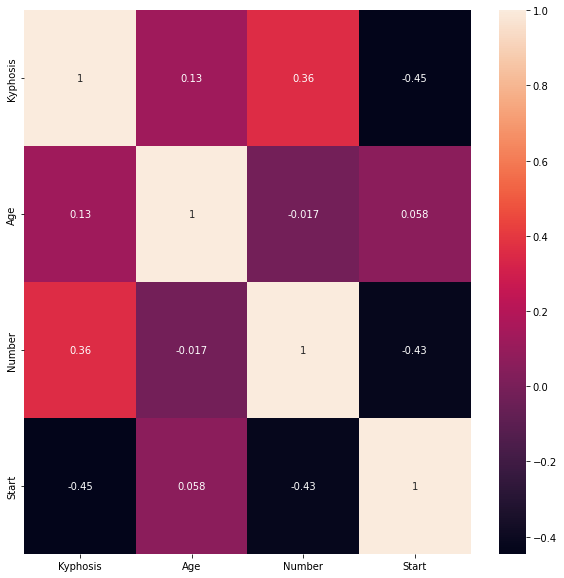

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True)

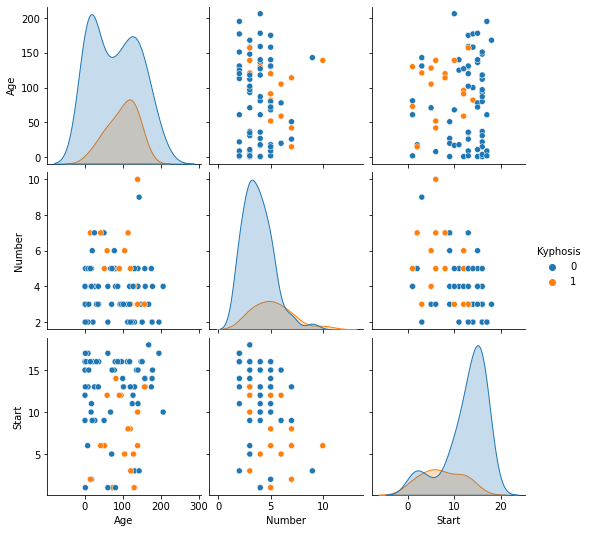

In [ ]:
sns.pairplot(df, hue = 'Kyphosis')

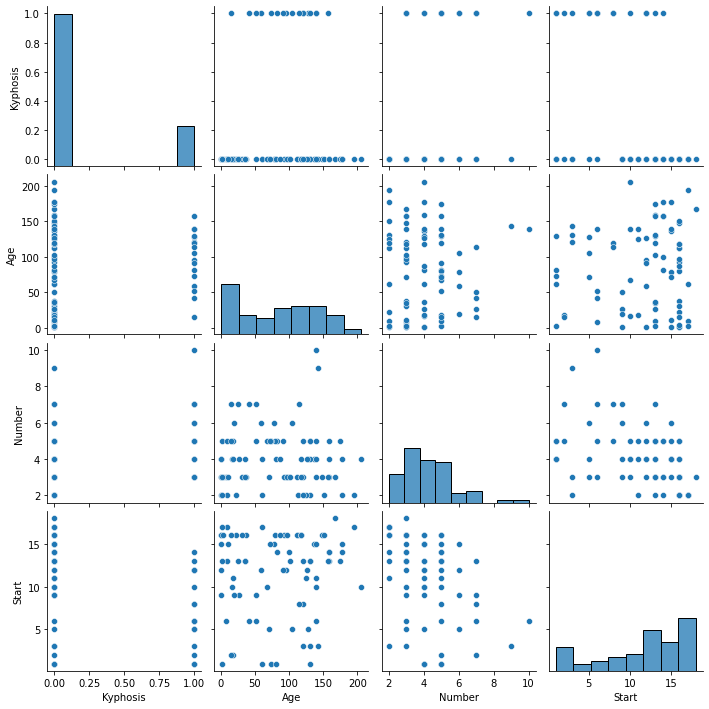

In [ ]:
sns.pairplot(df)

#Plotting the data count plot

<AxesSubplot:xlabel='Kyphosis', ylabel='count'>

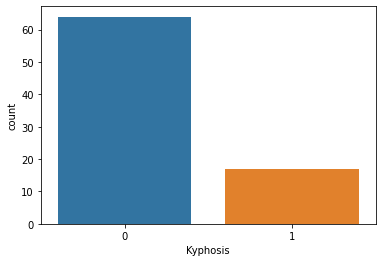

In [ ]:
sns.countplot(x = df['Kyphosis'])

#Creating Testing and Training Dataset

In [ ]:
X = df.drop(['Kyphosis'], axis = 1)
y = df['Kyphosis']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
X_train.shape

(64, 3)

In [ ]:
X_test.shape

(17, 3)

#Scaling the Data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Scaling not important for logistic regression. Scaling can be used in a big project

#Training a Logistic Regression Classifier Model

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(64, 3)
(64,)
(17, 3)
(17,)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

#Evaluating the Trained Model Performance

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_predict_test = model.predict(X_test)

<AxesSubplot:>

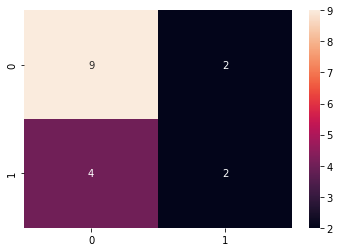

In [ ]:
confMatrix = confusion_matrix(y_test, y_predict_test)
sns.heatmap(confMatrix, annot = True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75        11
           1       0.50      0.33      0.40         6

    accuracy                           0.65        17
   macro avg       0.60      0.58      0.58        17
weighted avg       0.62      0.65      0.63        17



#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

<AxesSubplot:>

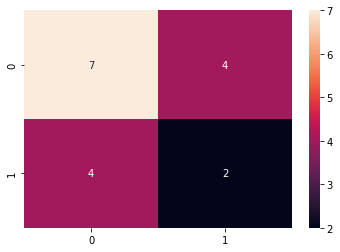

In [ ]:
y_predict_test = decision_tree.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64        11
           1       0.33      0.33      0.33         6

    accuracy                           0.53        17
   macro avg       0.48      0.48      0.48        17
weighted avg       0.53      0.53      0.53        17



In [ ]:
feature_importance = pd.DataFrame( decision_tree.feature_importances_, 
                                  index = X_train.columns,
                                  columns = ['importance']).sort_values('importance', ascending = False)

AttributeError: ignored

In [ ]:
print(feature_importance)

# Random Forest Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_predict_test = random_forest.predict(X_test)

<AxesSubplot:>

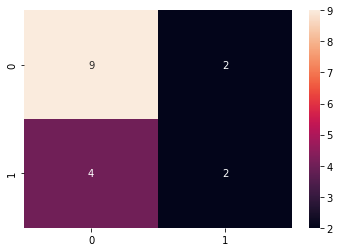

In [ ]:
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75        11
           1       0.50      0.33      0.40         6

    accuracy                           0.65        17
   macro avg       0.60      0.58      0.58        17
weighted avg       0.62      0.65      0.63        17

